In [1]:
# Author: Brent Artuch
# Date: 2024-10-09

import sympy as sp
import numpy as np 
from IPython.display import *

from qiskit.quantum_info import Operator, Statevector

sp.init_printing()

## Column Vectors
3.1 - A qubit has the following state: <br>
\begin{align*}
\frac{1}{2}\ket{0}-\frac{\sqrt{3}}{2}\ket{1}
\end{align*}
Write the state as a column vector:<br>
Answer:<br>
\begin{align*}
\ket{\psi}=\frac{1}{2}\ket{0}-\frac{\sqrt{3}}{2}\ket{1}=\frac{1}{2}\begin{bmatrix} 1 \\ 0\end{bmatrix}-\frac{\sqrt{3}}{2}\begin{bmatrix} 0 \\ 1\end{bmatrix}=\begin{bmatrix} \frac{1}{2} \\ 0\end{bmatrix}+\begin{bmatrix} 0 \\ -\frac{\sqrt{3}}{2}\end{bmatrix}=\begin{bmatrix} \frac{1}{2} \\ -\frac{\sqrt{3}}{2}\end{bmatrix}
\end{align*}

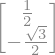

In [2]:
psi = Statevector([1/2,-sp.sqrt(3)/2])
column_vector = sp.Matrix([[sp.nsimplify(psi[0])],[sp.nsimplify(psi[1])]])
column_vector